In [1]:
%matplotlib inline
import collections
import glob
import os
from matplotlib import pyplot as plt
from telicity.util import io
import seaborn as sns
import numpy as np
import pandas as pd

([<matplotlib.axis.XTick at 0x135754e90>,
 <a list of 6 Text major ticklabel objects>)

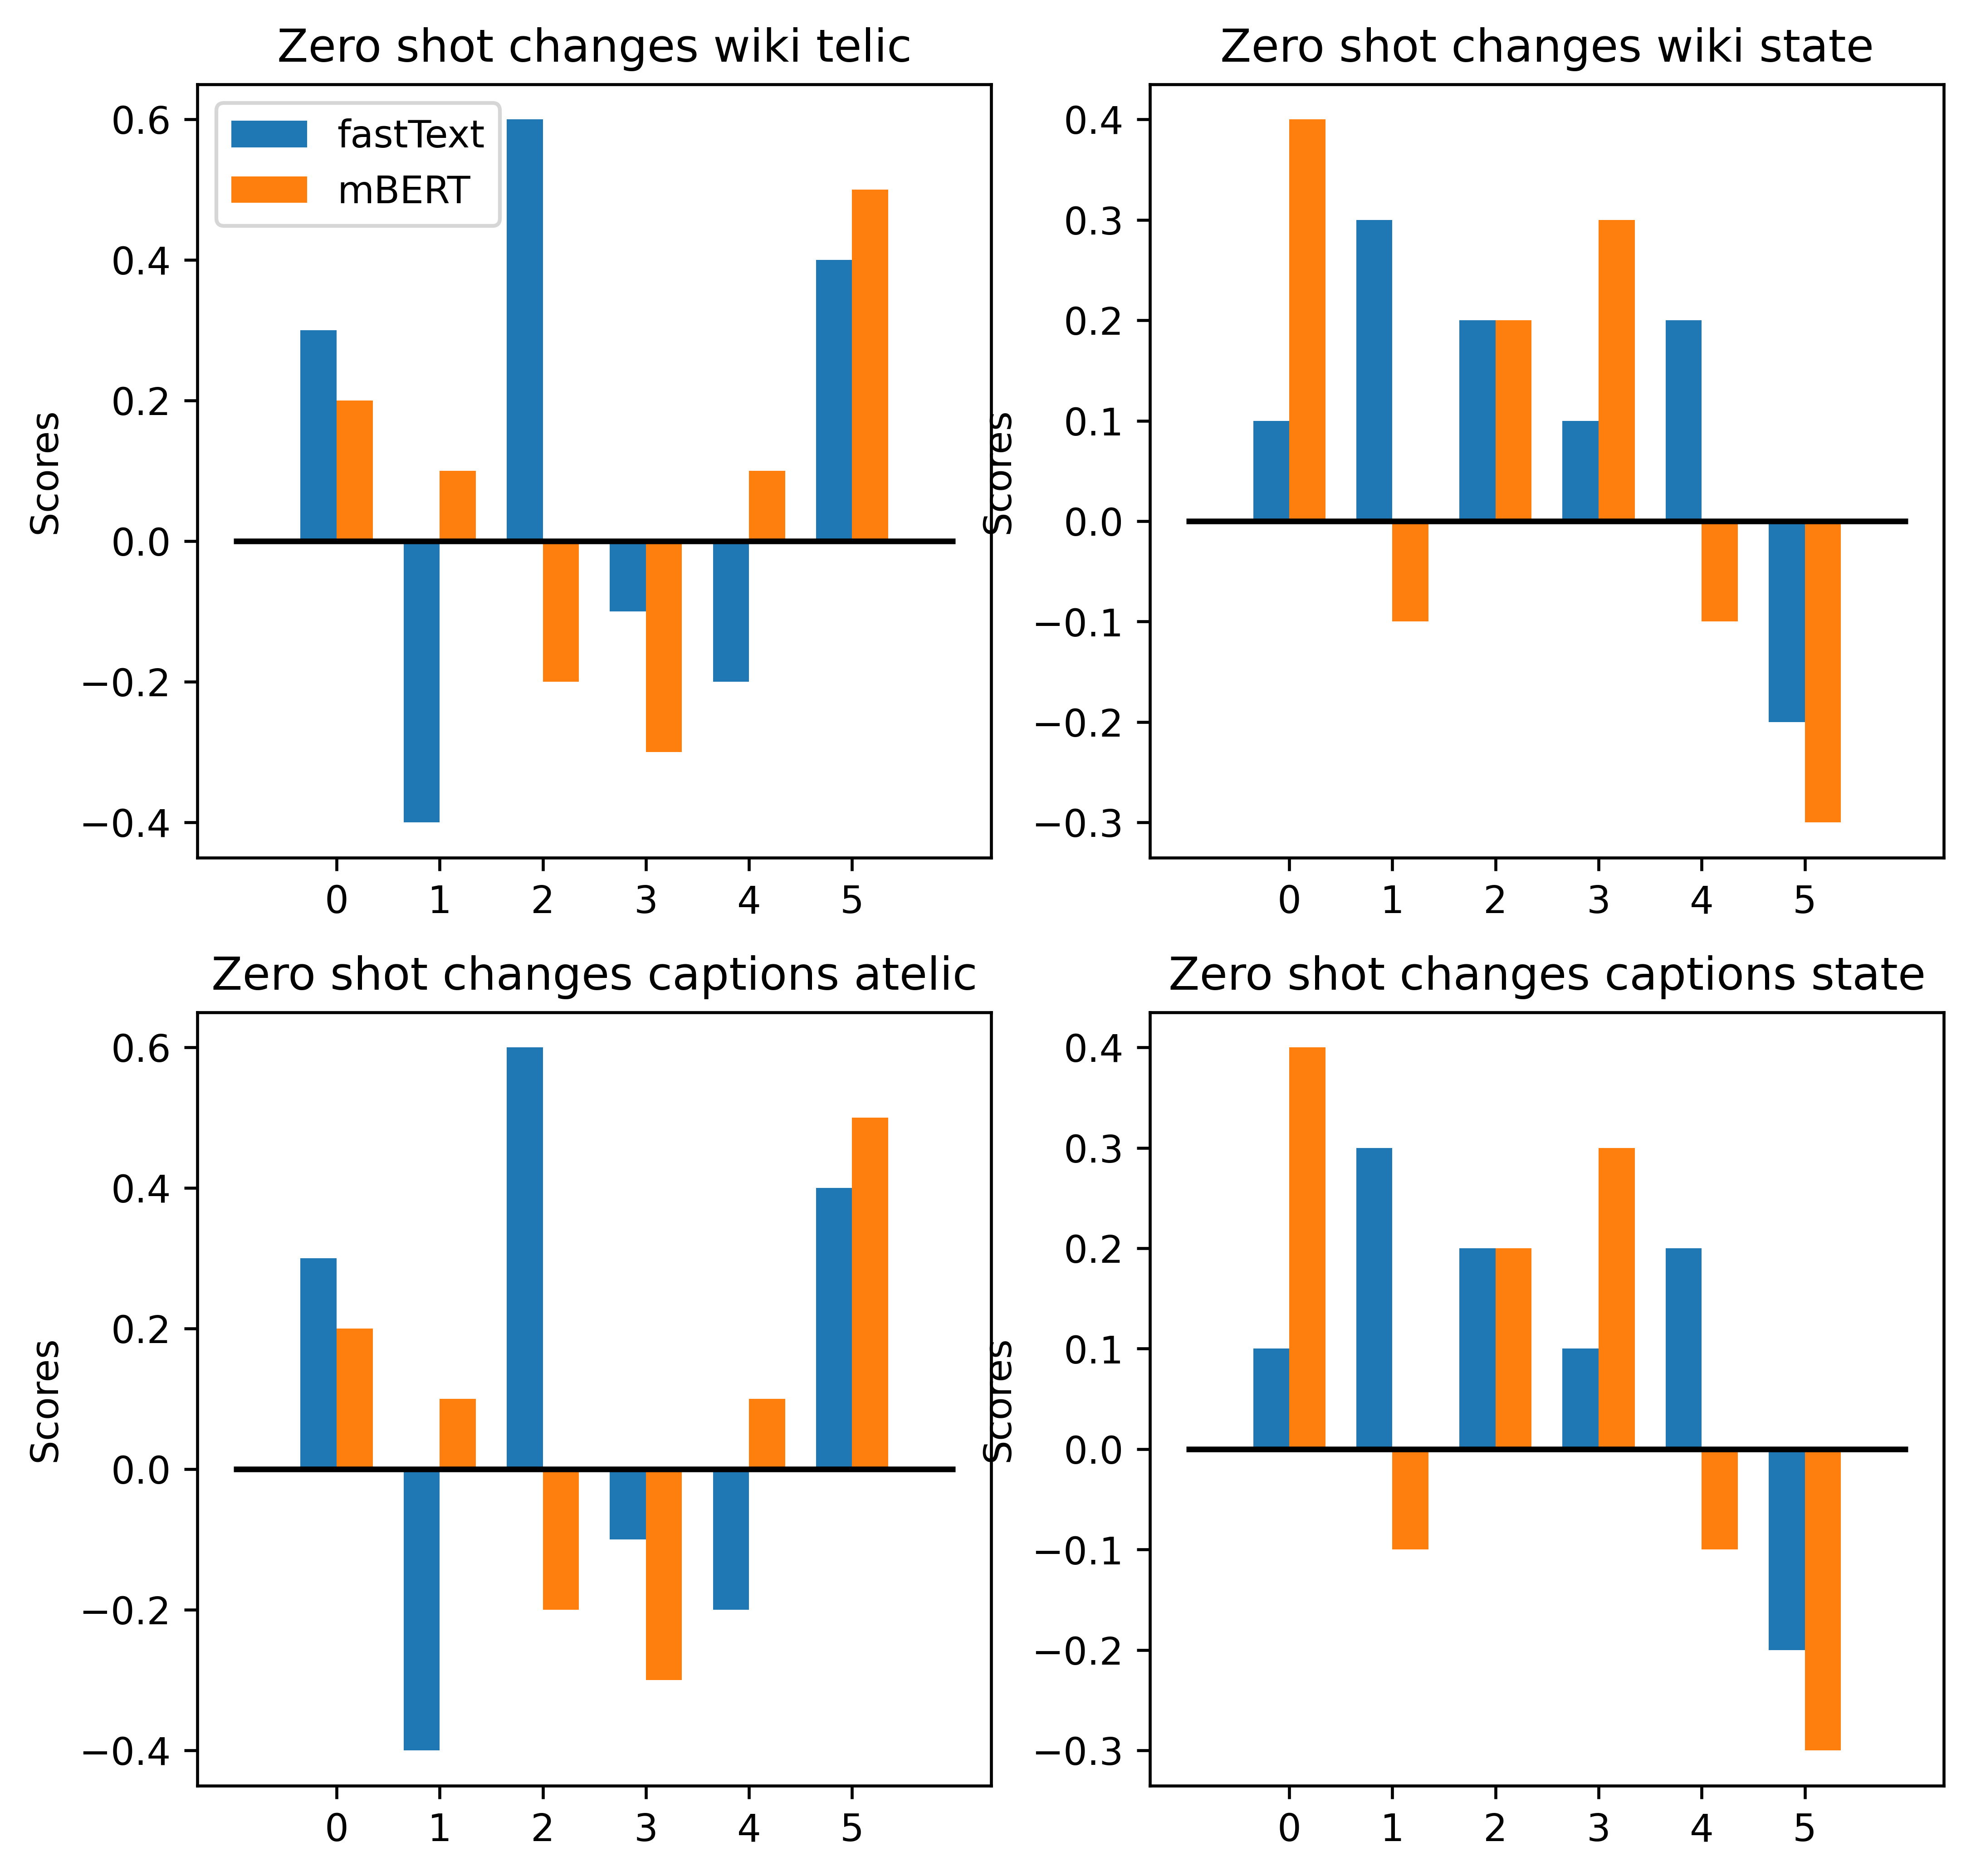

In [10]:
# Mockup
fig = plt.figure(figsize=(8.28, 8.28), dpi=600, facecolor='w', edgecolor='k')

labels = ['AR', 'DE', 'FA', 'RU', 'TR', 'ZH']

ft_changes_wiki_telic = np.array([0.19, -0.4, 0.6, -0.1, -0.2, 0.4])
mbert_changes_wiki_telic = np.array([0.2, 0.1, -0.2, -0.3, 0.1, 0.5])

ft_changes_wiki_state = np.array([0.0, 0.3, 0.2, 0.1, 0.2, -0.2])
mbert_changes_wiki_state = np.array([0.4, -0.1, 0.2, 0.3, -0.1, -0.3])

ft_changes_captions_atelic = np.array([-0.11, -0.07, 0.6, -0.1, -0.2, 0.4])
mbert_changes_captions_atelic = np.array([0.2, 0.1, -0.2, -0.3, 0.1, 0.5])

ft_changes_captions_state = np.array([-0.74, -0.12, 0.2, 0.1, 0.2, -0.2])
mbert_changes_captions_state = np.array([0.4, -0.1, 0.2, 0.3, -0.1, -0.3])



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.subplot(221)
rects1 = plt.bar(x - width/2, ft_changes_wiki_telic, width, label='fastText')
rects2 = plt.bar(x + width/2, mbert_changes_wiki_telic, width, label='mBERT')
plt.hlines(0, -1, 6)

plt.ylabel('Scores')
plt.title('Zero shot changes wiki telic')
plt.xticks(x)
#plt.xticklabels(labels)
plt.legend()


plt.subplot(222)
rects1 = plt.bar(x - width/2, ft_changes_wiki_state, width, label='fastText')
rects2 = plt.bar(x + width/2, mbert_changes_wiki_state, width, label='mBERT')
plt.hlines(0, -1, 6)

plt.ylabel('Scores')
plt.title('Zero shot changes wiki state')
plt.xticks(x)
#plt.xticklabels(labels)


plt.subplot(223)
rects1 = plt.bar(x - width/2, ft_changes_captions_atelic, width, label='fastText')
rects2 = plt.bar(x + width/2, mbert_changes_captions_atelic, width, label='mBERT')
plt.hlines(0, -1, 6)

plt.ylabel('Scores')
plt.title('Zero shot changes captions atelic')
plt.xticks(x)
#plt.xticklabels(labels)

plt.subplot(224)
rects1 = plt.bar(x - width/2, ft_changes_captions_state, width, label='fastText')
rects2 = plt.bar(x + width/2, mbert_changes_captions_state, width, label='mBERT')
plt.hlines(0, -1, 6)

plt.ylabel('Scores')
plt.title('Zero shot changes captions state')
plt.xticks(x)
#plt.xticklabels(labels)

### Performance Summary

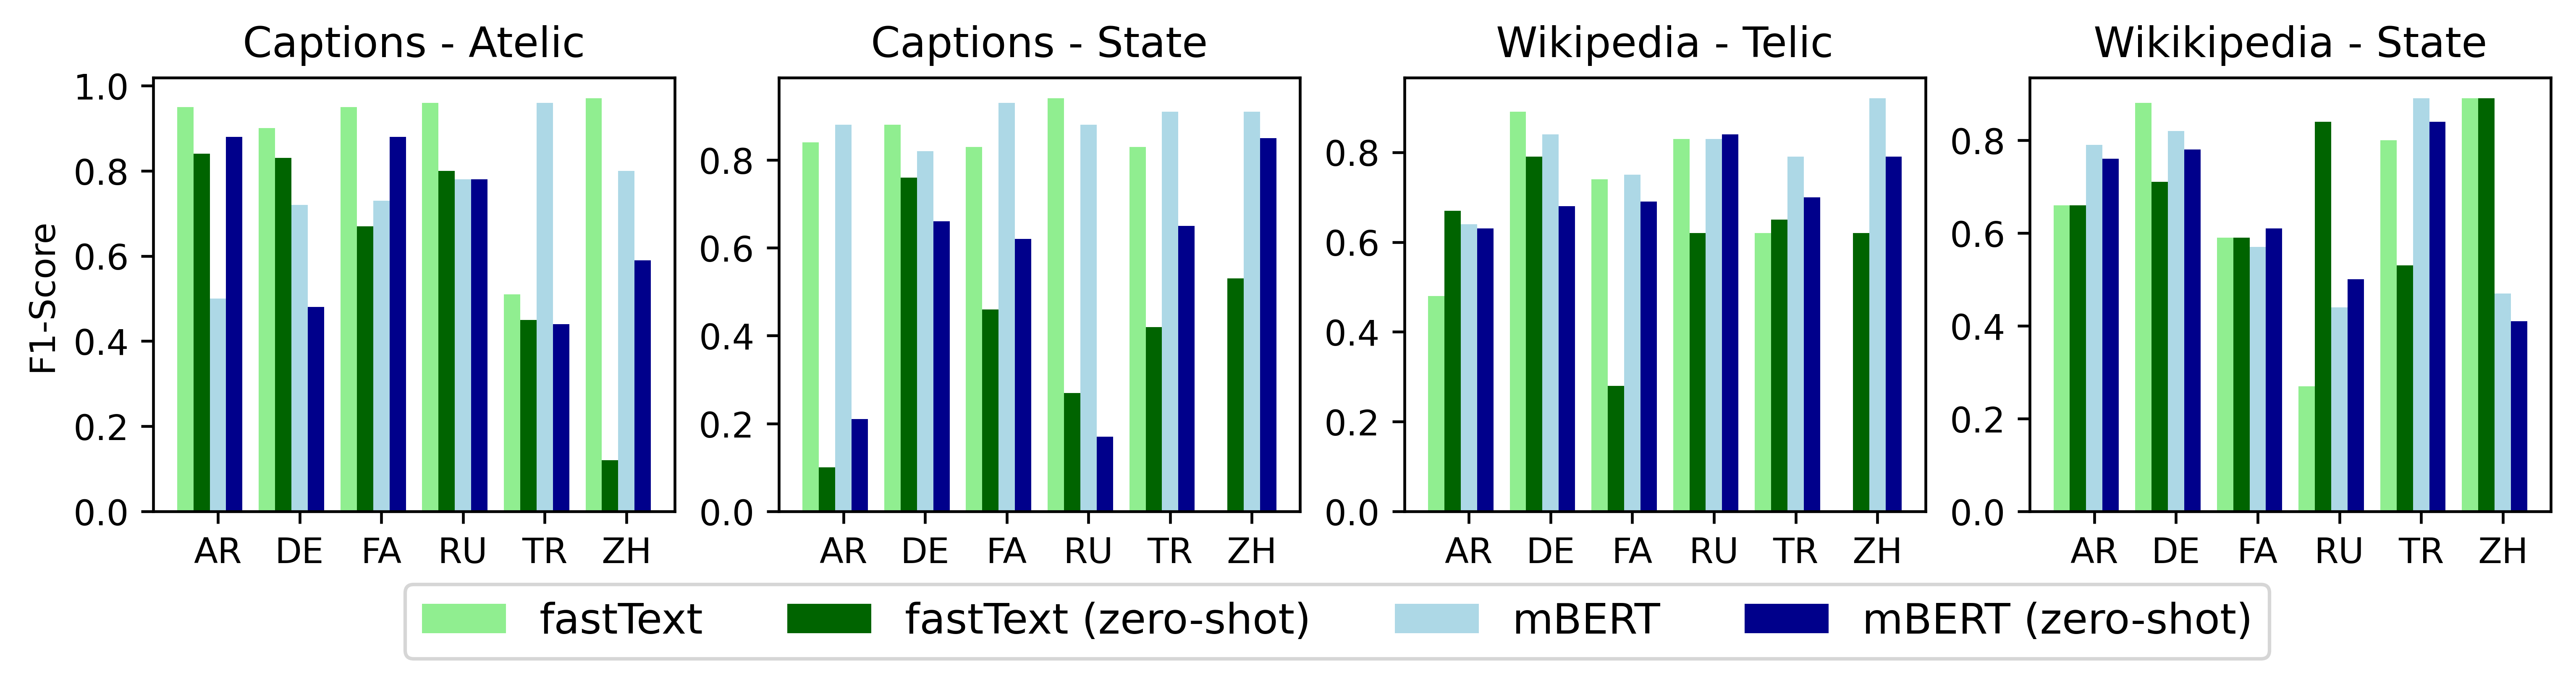

In [55]:
#fig = plt.figure(figsize=(8.28, 8.28), dpi=600, facecolor='w', edgecolor='k') # 2/2 plot
fig = plt.figure(figsize=(12.28, 2.28), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['AR', 'DE', 'FA', 'RU', 'TR', 'ZH']

ft_wiki_telic_mono = np.array([0.48, 0.89, 0.74, 0.83, 0.62, 0.0])
mbert_wiki_telic_mono = np.array([0.64, 0.84, 0.75, 0.83, 0.79, 0.92])
ft_wiki_telic_cross = np.array([0.67, 0.79, 0.28, 0.62, 0.65, 0.62])
mbert_wiki_telic_cross = np.array([0.63, 0.68, 0.69, 0.84, 0.70, 0.79])


ft_wiki_state_mono = np.array([0.66, 0.88, 0.59, 0.27, 0.80, 0.89])
mbert_wiki_state_mono = np.array([0.79, 0.82, 0.57, 0.44, 0.89, 0.47])
ft_wiki_state_cross = np.array([0.66, 0.71, 0.59, 0.84, 0.53, 0.89])
mbert_wiki_state_cross = np.array([0.76, 0.78, 0.61, 0.50, 0.84, 0.41])

ft_captions_atelic_mono = np.array([0.95, 0.90, 0.95, 0.96, 0.51, 0.97])
mbert_captions_atelic_mono = np.array([0.50, 0.72, 0.73, 0.78, 0.96, 0.80])
ft_captions_atelic_cross = np.array([0.84, 0.83, 0.67, 0.80, 0.45, 0.12])
mbert_captions_atelic_cross = np.array([0.88, 0.48, 0.88, 0.78, 0.44, 0.59])


ft_captions_state_mono = np.array([0.84, 0.88, 0.83, 0.94, 0.83, 0.0])
mbert_captions_state_mono = np.array([0.88, 0.82, 0.93, 0.88, 0.91, 0.91])
ft_captions_state_cross = np.array([0.1, 0.76, 0.46, 0.27, 0.42, 0.53])
mbert_captions_state_cross = np.array([0.21, 0.66, 0.62, 0.17, 0.65, 0.85])




x = np.array([0, 5, 10, 15, 20, 25]) # the label locations

width = 1.  # the width of the bars

plt.subplot(141)
#plt.grid(True)
rects1 = plt.bar(x - (2*width), ft_captions_atelic_mono, width, label='fastText', color='lightgreen')
rects2 = plt.bar(x - width, ft_captions_atelic_cross, width, label='fastText (zero-shot)', color='darkgreen')
rects3 = plt.bar(x, mbert_captions_atelic_mono, width, label='mBERT', color='lightblue')
rects4 = plt.bar(x + width, mbert_captions_atelic_cross, width, label='mBERT (zero-shot)', color='darkblue')
plt.xticks(x, labels)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
#plt.legend()


plt.subplot(142)
#plt.grid(True)
rects1 = plt.bar(x - (2*width), ft_captions_state_mono, width, label='fastText', color='lightgreen')
rects2 = plt.bar(x - width, ft_captions_state_cross, width, label='fastText (zero-shot)', color='darkgreen')
rects3 = plt.bar(x, mbert_captions_state_mono, width, label='mBERT', color='lightblue')
rects4 = plt.bar(x + width, mbert_captions_state_cross, width, label='mBERT (zero-shot)', color='darkblue')
plt.xticks(x, labels)
plt.title('Captions - State')



plt.subplot(143)
#plt.grid(True)
rects1 = plt.bar(x - (2*width), ft_wiki_telic_mono, width, label='fastText', color='lightgreen')
rects2 = plt.bar(x - width, ft_wiki_telic_cross, width, label='fastText (zero-shot)', color='darkgreen')
rects3 = plt.bar(x, mbert_wiki_telic_mono, width, label='mBERT', color='lightblue')
rects4 = plt.bar(x + width, mbert_wiki_telic_cross, width, label='mBERT (zero-shot)', color='darkblue')
plt.xticks(x, labels)
plt.title('Wikipedia - Telic')
#plt.legend()


plt.subplot(144)
#plt.grid(True)
rects1 = plt.bar(x - (2*width), ft_wiki_state_mono, width, label='fastText', color='lightgreen')
rects2 = plt.bar(x - width, ft_wiki_state_cross, width, label='fastText (zero-shot)', color='darkgreen')
rects3 = plt.bar(x, mbert_wiki_state_mono, width, label='mBERT', color='lightblue')
rects4 = plt.bar(x + width, mbert_wiki_state_cross, width, label='mBERT (zero-shot)', color='darkblue')
plt.xticks(x, labels)
plt.title('Wikikipedia - State')
#plt.legend()


leg = plt.legend(bbox_to_anchor=(0.5, -0.12), fancybox=True, fontsize=12, ncol=4)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

### Ablation

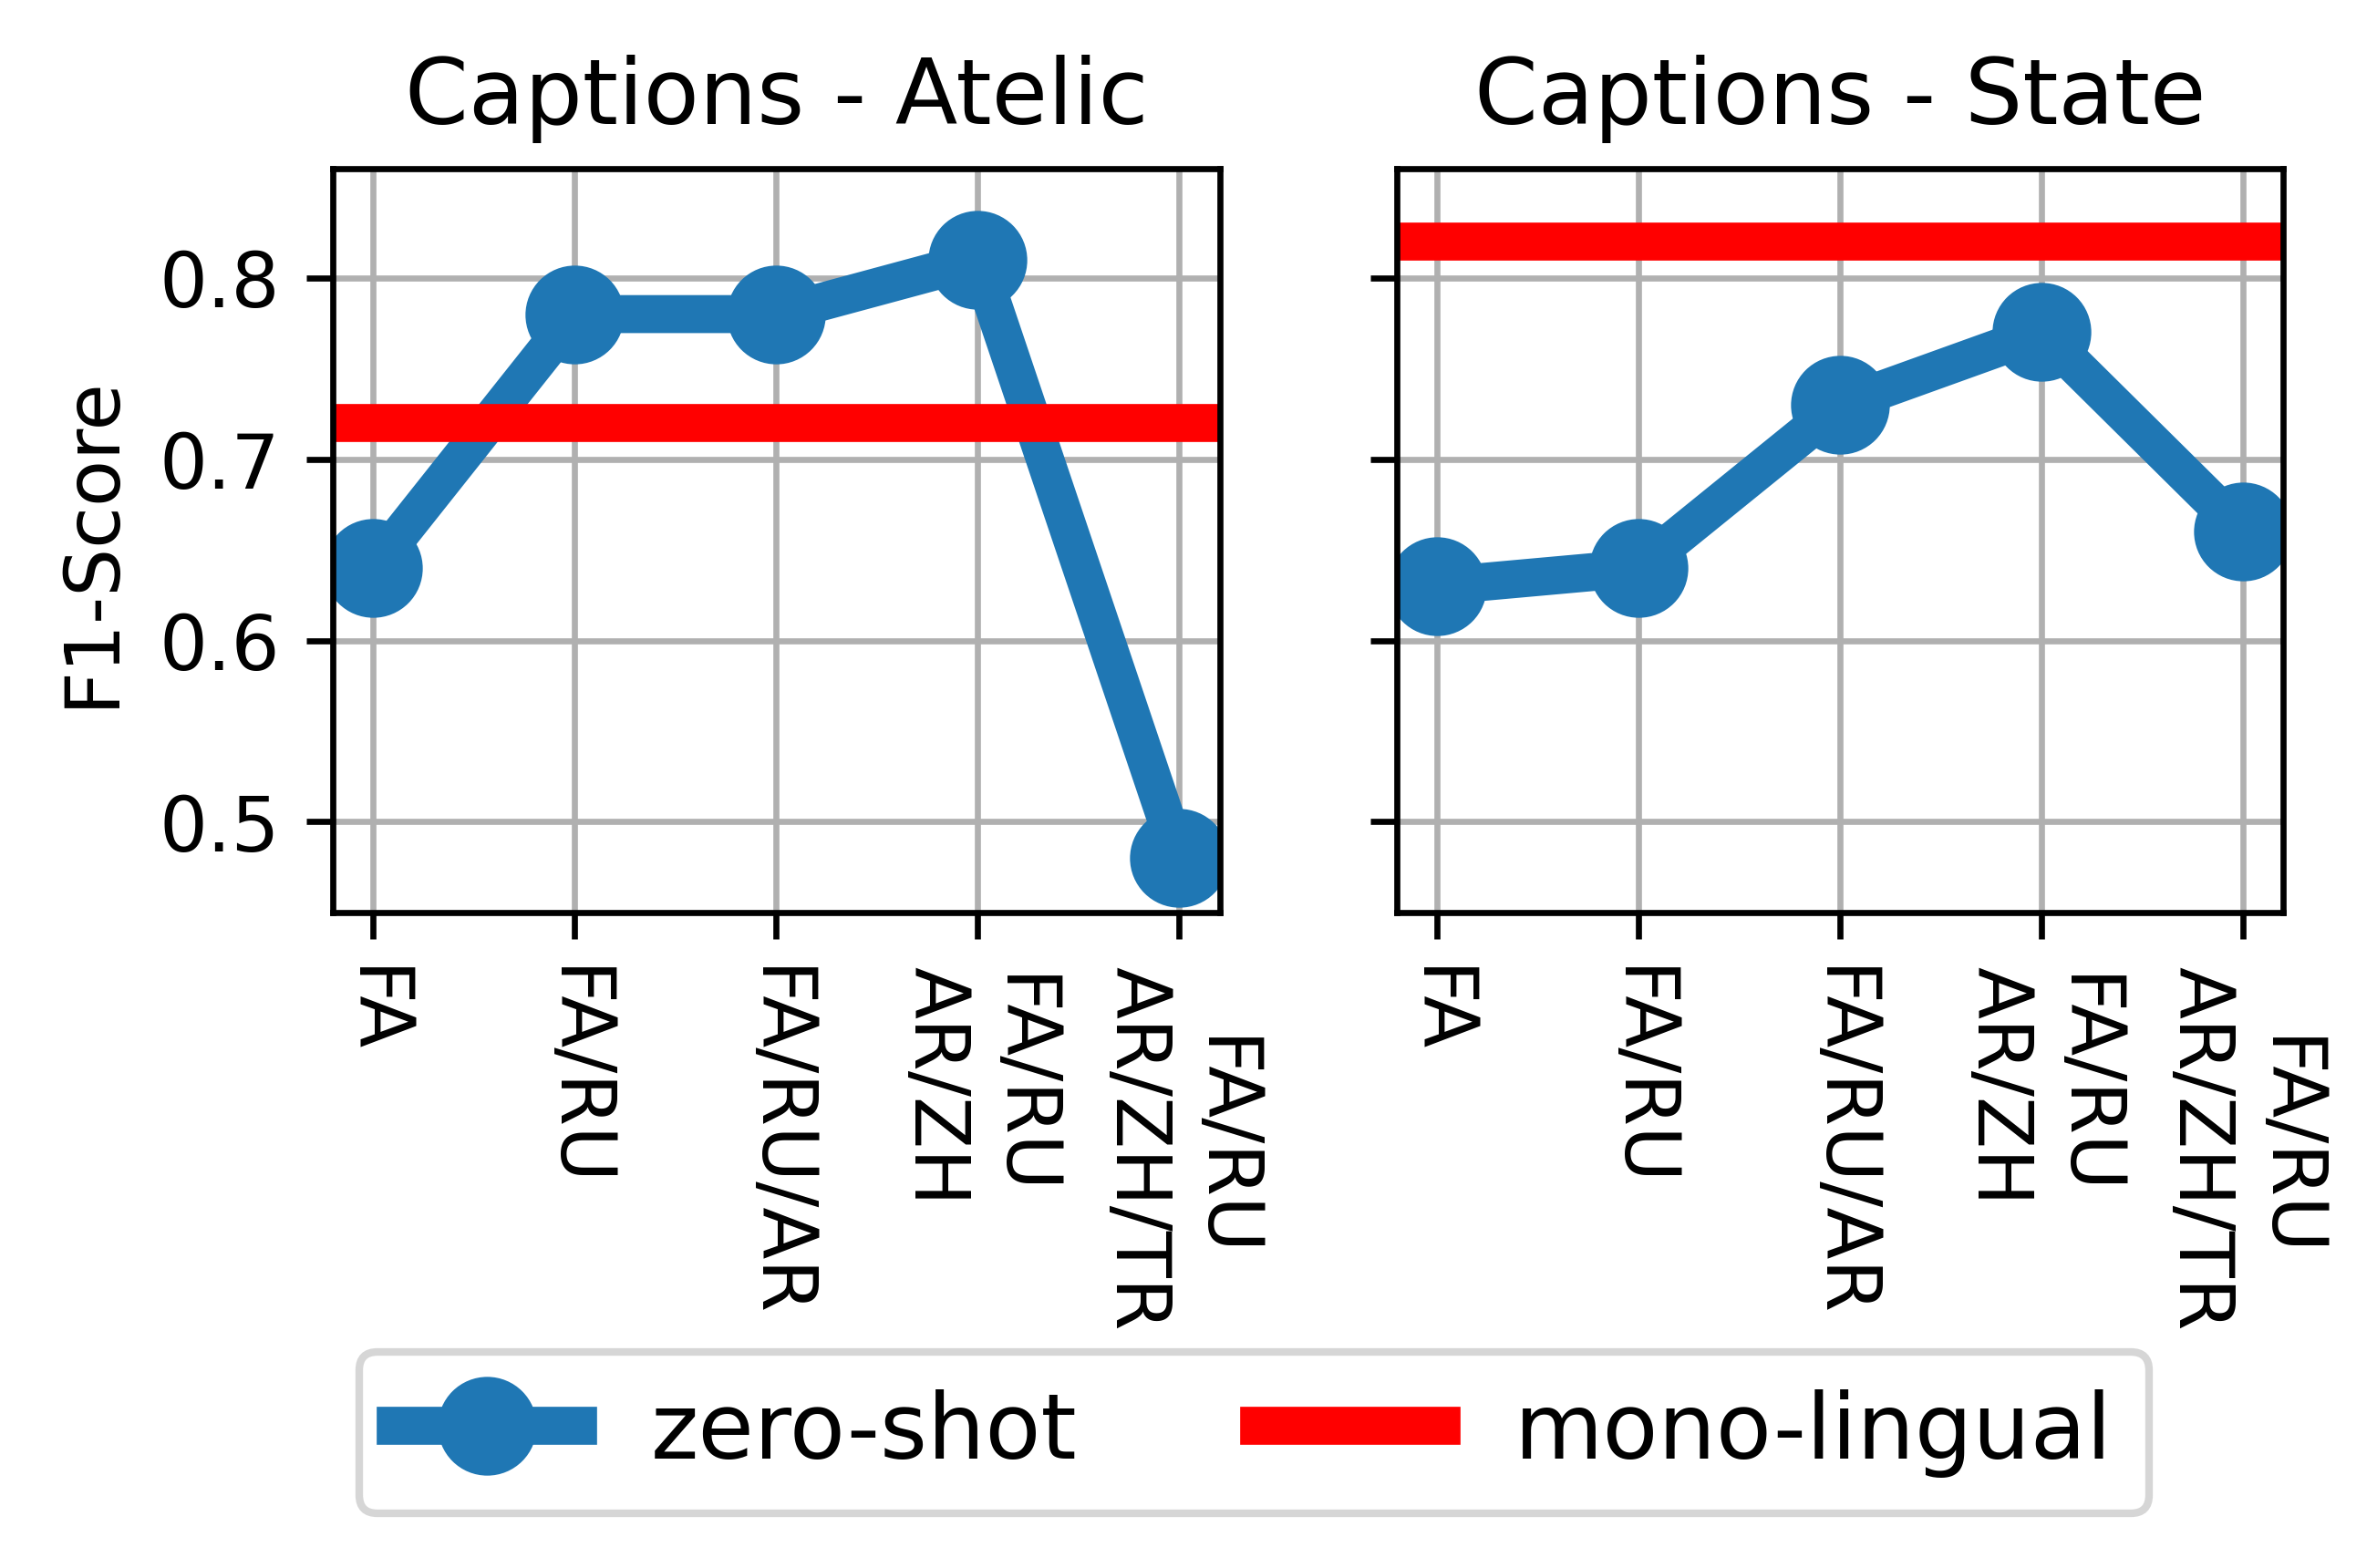

In [105]:
fig = plt.figure(figsize=(4.6, 1.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['FA', 'FA/RU', 'FA/RU/AR', 'FA/RU\nAR/ZH', 'FA/RU\nAR/ZH/TR']
x = np.arange(len(labels))

bert_mono_lingual_atelic = 0.72
bert_mono_lingual_state = 0.82
bert_captions_atelic = np.array([0.64, 0.78, 0.78, 0.81, 0.48])
bert_captions_state = np.array([0.63, 0.64, 0.73, 0.77, 0.66])

plt.subplot(121)
#plt.hold(True)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
plt.plot(x, bert_captions_atelic, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.45, 0.86))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.5, 0.6, 0.7, 0.8]), [0.5, 0.6, 0.7, 0.8])
plt.grid(True)

plt.subplot(122)
plt.title('Captions - State')
plt.plot(x, bert_captions_state, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.45, 0.86))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.5, 0.6, 0.7, 0.8]), [])
plt.grid(True)

leg = plt.legend(bbox_to_anchor=(0.9, -0.53), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-DE.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

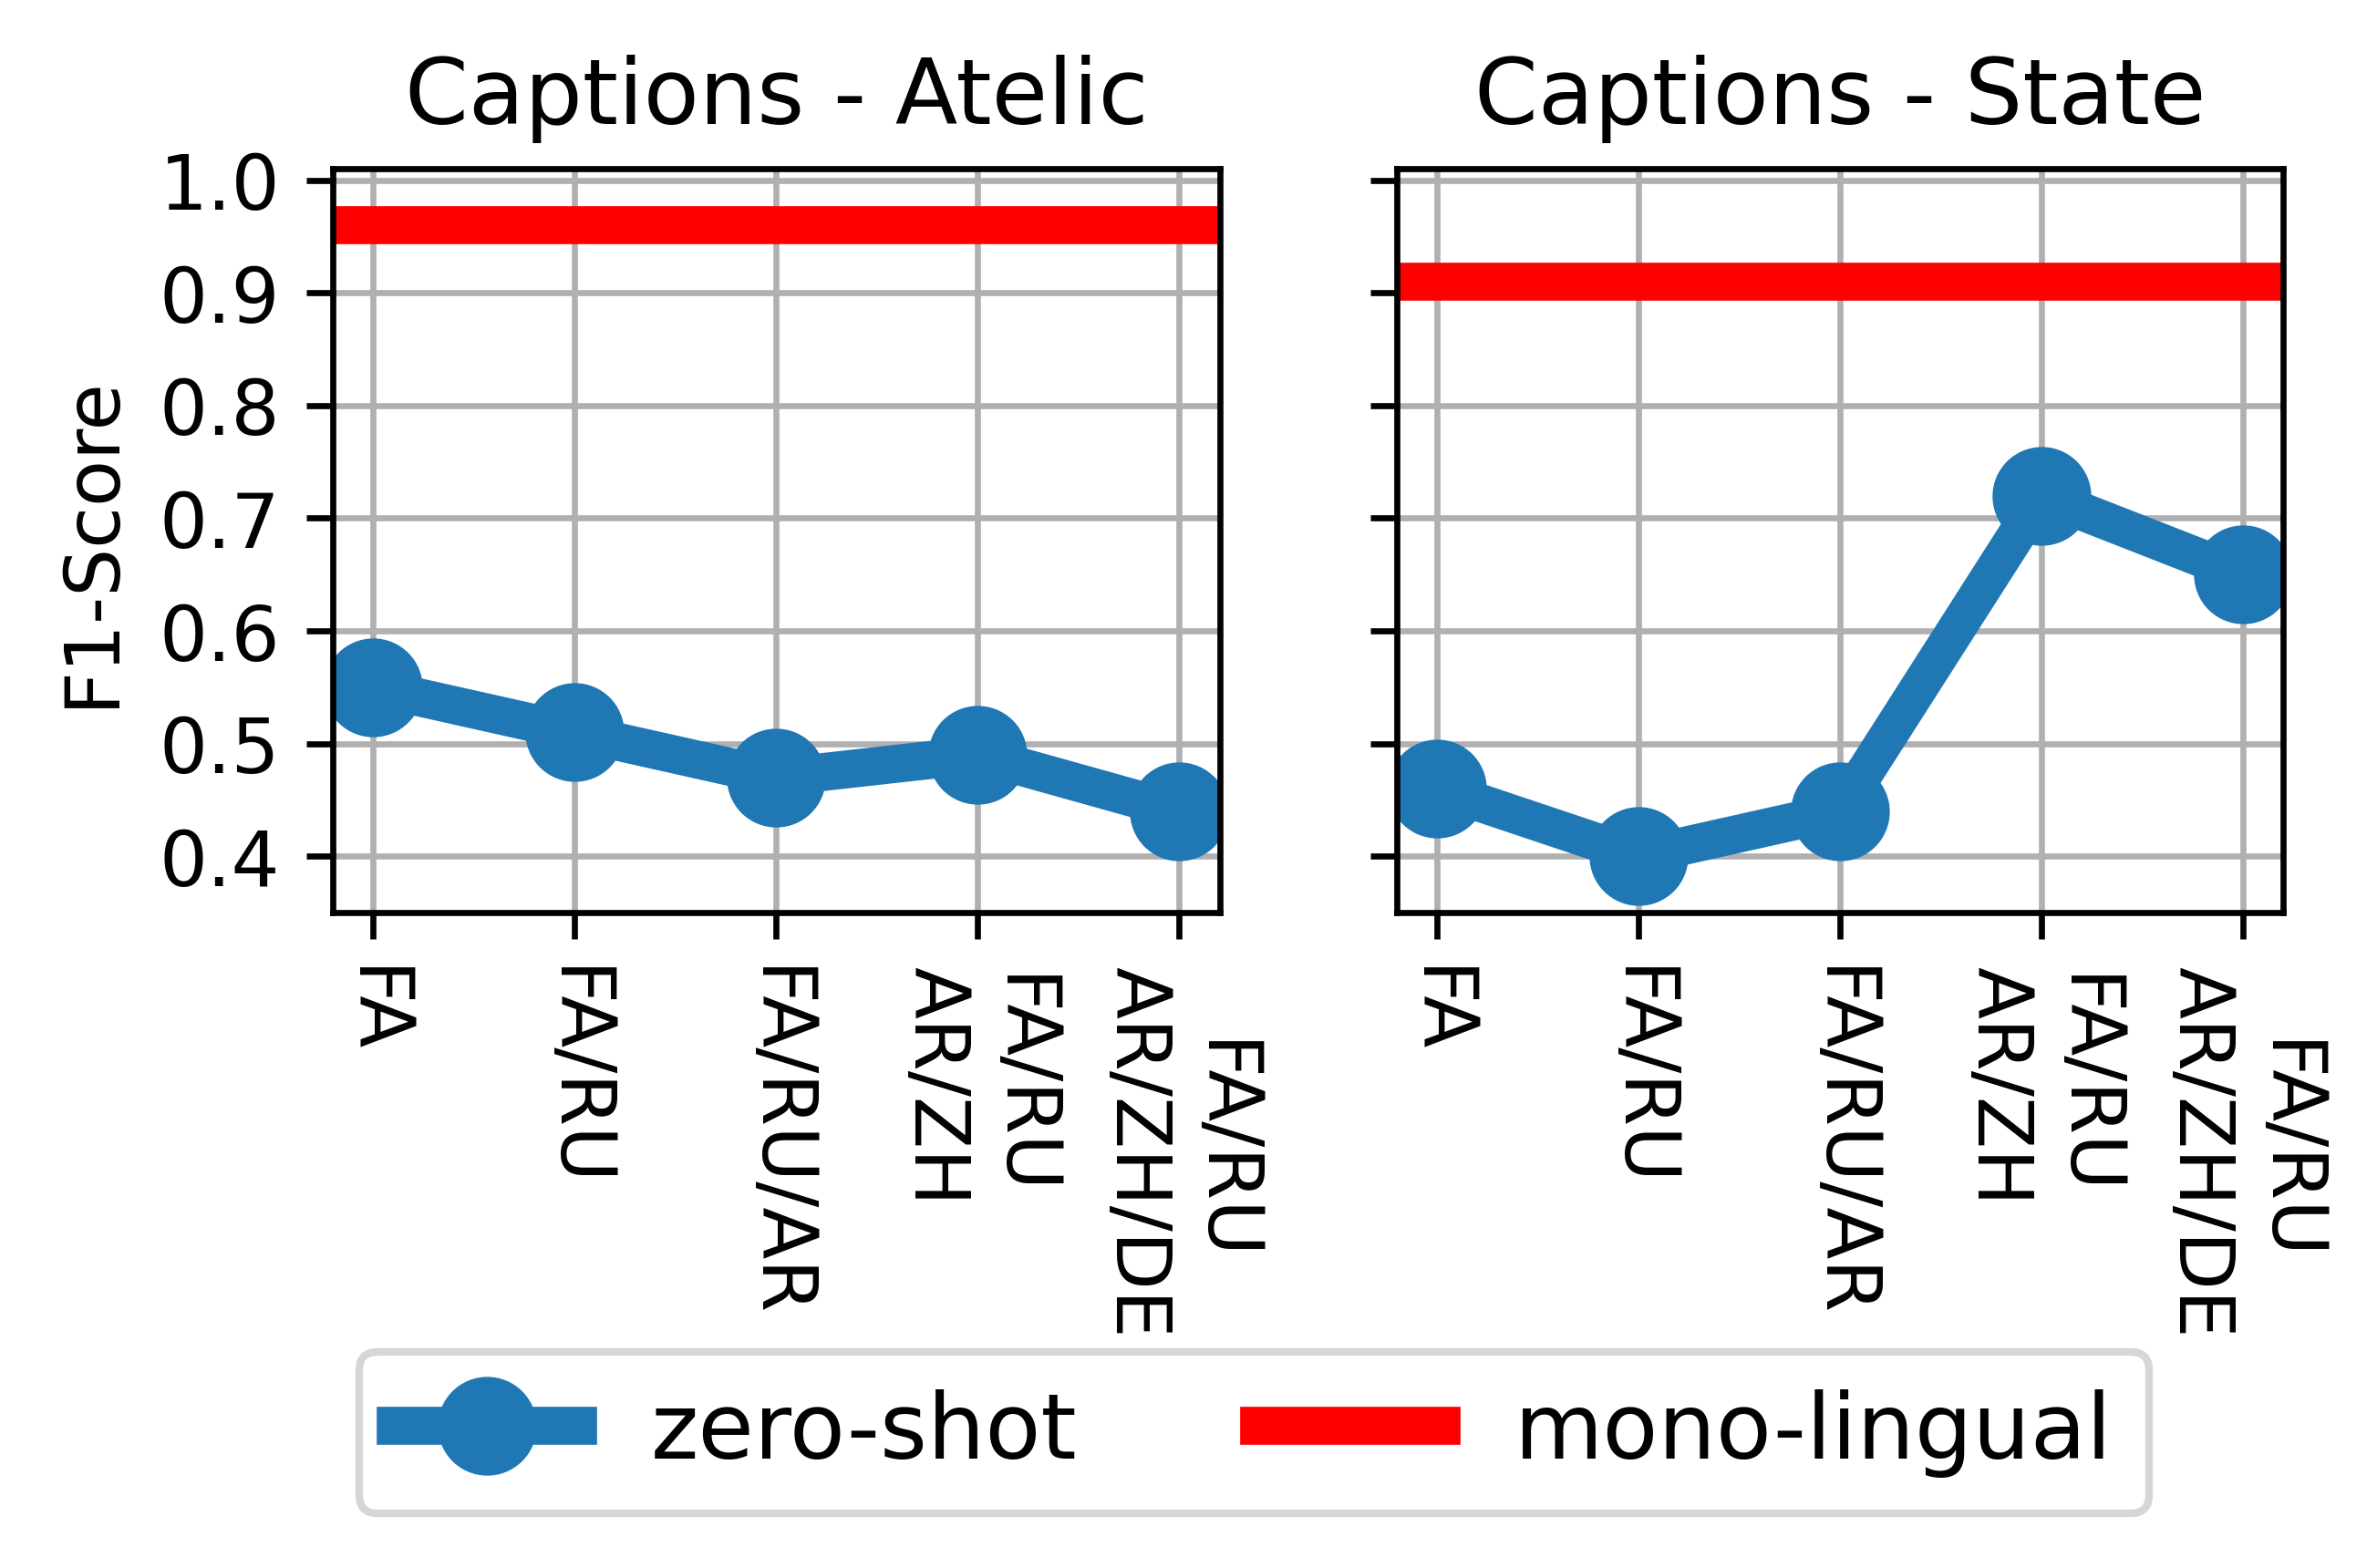

In [108]:
fig = plt.figure(figsize=(4.6, 1.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['FA', 'FA/RU', 'FA/RU/AR', 'FA/RU\nAR/ZH', 'FA/RU\nAR/ZH/DE']
x = np.arange(len(labels))

bert_mono_lingual_atelic = 0.96
bert_mono_lingual_state = 0.91
bert_captions_atelic = np.array([0.55, 0.51, 0.47, 0.49, 0.44])
bert_captions_state = np.array([0.46, 0.40, 0.44, 0.72, 0.65])

plt.subplot(121)
#plt.hold(True)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
plt.plot(x, bert_captions_atelic, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.35, 1.01))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True)

plt.subplot(122)
plt.title('Captions - State')
plt.plot(x, bert_captions_state, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.35, 1.01))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), [])
plt.grid(True)

leg = plt.legend(bbox_to_anchor=(0.9, -0.53), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-TR.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

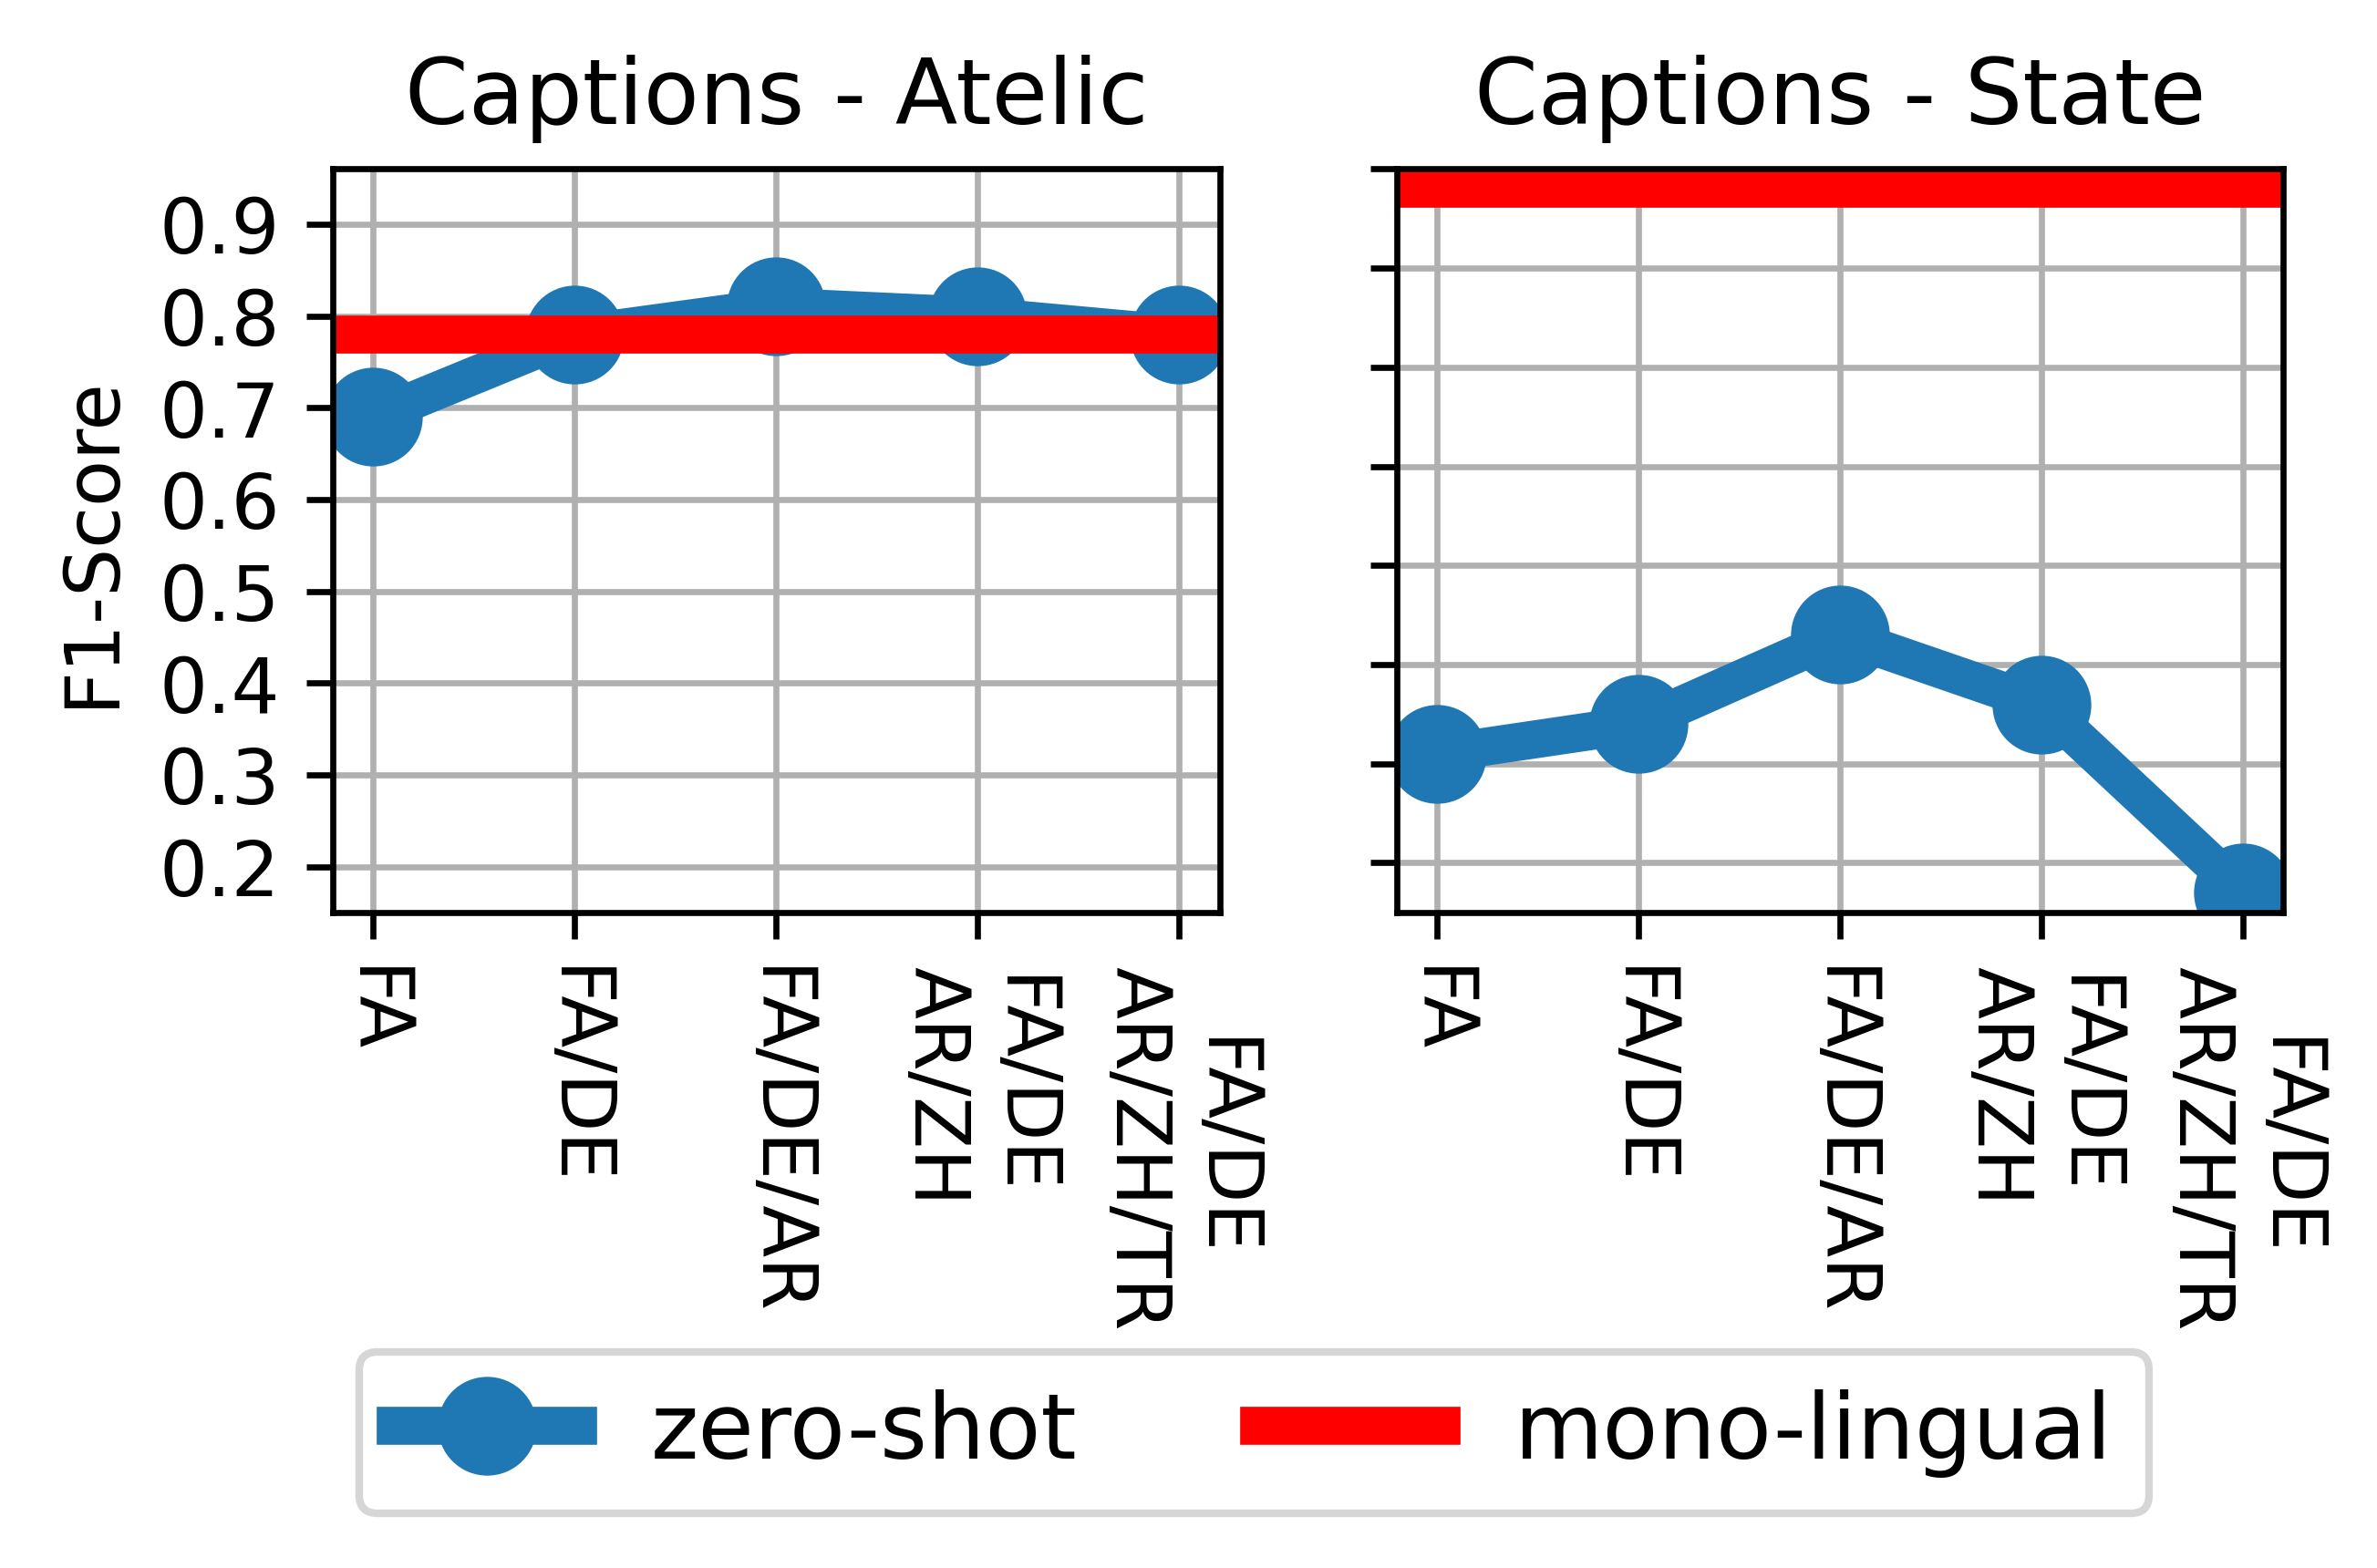

In [111]:
fig = plt.figure(figsize=(4.6, 1.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['FA', 'FA/DE', 'FA/DE/AR', 'FA/DE\nAR/ZH', 'FA/DE\nAR/ZH/TR']
x = np.arange(len(labels))

bert_mono_lingual_atelic = 0.78
bert_mono_lingual_state = 0.88
bert_captions_atelic = np.array([0.69, 0.78, 0.81, 0.80, 0.78])
bert_captions_state = np.array([0.31, 0.34, 0.43, 0.36, 0.17])

plt.subplot(121)
#plt.hold(True)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
plt.plot(x, bert_captions_atelic, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.96))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(122)
plt.title('Captions - State')
plt.plot(x, bert_captions_state, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.86))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

leg = plt.legend(bbox_to_anchor=(0.9, -0.53), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-RU.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

In [ ]:
fig = plt.figure(figsize=(4.6, 1.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['FA', 'FA/DE', 'FA/DE/ZH', 'FA/DE\nZH/RU', 'FA/DE\nZH/RU/TR']
x = np.arange(len(labels))

bert_mono_lingual_atelic = 0.50
bert_mono_lingual_state = 0.88
bert_captions_atelic = np.array([0.81, 0.82, 0.84, 0.83, 0.83])
bert_captions_state = np.array([0.06, 0.12, 0.13, 0.20, 0.24])
ylim_atelic_ar = ((0.45, 0.90))
ylim_state_ar = ((0., 0.90))

plt.subplot(121)
#plt.hold(True)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
plt.plot(x, bert_captions_atelic, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.96))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(122)
plt.title('Captions - State')
plt.plot(x, bert_captions_state, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.86))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

leg = plt.legend(bbox_to_anchor=(0.9, -0.53), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-AR.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

In [ ]:
fig = plt.figure(figsize=(4.6, 1.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['DE', 'DE/AR', 'DE/AR/ZH', 'DE/AR\nZH/RU', 'DE/AR\nZH/RU/TR']
x = np.arange(len(labels))

bert_mono_lingual_atelic = 0.73
bert_mono_lingual_state = 0.93
bert_captions_atelic = np.array([0.88, 0.89, 0.86, 0.83, 0.88])
bert_captions_state = np.array([0.67, 0.58, 0.59, 0.60, 0.62])

plt.subplot(121)
#plt.hold(True)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
plt.plot(x, bert_captions_atelic, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.96))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(122)
plt.title('Captions - State')
plt.plot(x, bert_captions_state, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.86))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

leg = plt.legend(bbox_to_anchor=(0.9, -0.53), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-FA.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

In [ ]:
fig = plt.figure(figsize=(4.6, 1.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

labels = ['DE', 'DE/AR', 'DE/AR/ZH', 'DE/AR\nZH/RU', 'DE/AR\nZH/RU/TR']
x = np.arange(len(labels))

bert_mono_lingual_atelic = 0.80
bert_mono_lingual_state = 0.91
bert_captions_atelic = np.array([0.80, 0.81, 0.82, 0.82, 0.79])
bert_captions_state = np.array([0.34, 0.29, 0.32, 0.52, 0.41])

plt.subplot(121)
#plt.hold(True)
plt.title('Captions - Atelic')
plt.ylabel('F1-Score')
plt.plot(x, bert_captions_atelic, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.96))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(122)
plt.title('Captions - State')
plt.plot(x, bert_captions_state, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state, 0, len(labels), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim((0.15, 0.86))
plt.xticks(x, labels, rotation=-90)
plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

leg = plt.legend(bbox_to_anchor=(0.9, -0.53), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-ZH.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

In [121]:
fig = plt.figure(figsize=(14.6, 11.8), dpi=600, facecolor='w', edgecolor='k') # 1/4 plot

### DATA ###

# AR
labels_ar = ['FA', 'FA/DE', 'FA/DE/ZH', 'FA/DE\nZH/RU', 'FA/DE\nZH/RU/TR']
x_ar = np.arange(len(labels))

bert_mono_lingual_atelic_ar = 0.50
bert_mono_lingual_state_ar = 0.88
bert_captions_atelic_ar = np.array([0.81, 0.82, 0.84, 0.83, 0.83])
bert_captions_state_ar = np.array([0.06, 0.12, 0.13, 0.20, 0.24])
ylim_atelic_ar = ((0.45, 0.90))
ylim_state_ar = ((0., 0.90))

# ZH
labels_zh = ['DE', 'DE/AR', 'DE/AR/ZH', 'DE/AR\nZH/RU', 'DE/AR\nZH/RU/TR']
x_zh = np.arange(len(labels))

bert_mono_lingual_atelic_zh = 0.80
bert_mono_lingual_state_zh = 0.91
bert_captions_atelic_zh = np.array([0.80, 0.81, 0.82, 0.82, 0.79])
bert_captions_state_zh = np.array([0.34, 0.29, 0.32, 0.52, 0.41])
ylim_atelic_zh = ((0.75, 0.85))
ylim_state_zh = ((0.25, 0.95))

# FA
labels_fa = ['DE', 'DE/AR', 'DE/AR/ZH', 'DE/AR\nZH/RU', 'DE/AR\nZH/RU/TR']
x_fa = np.arange(len(labels))

bert_mono_lingual_atelic_fa = 0.73
bert_mono_lingual_state_fa = 0.93
bert_captions_atelic_fa = np.array([0.88, 0.89, 0.86, 0.83, 0.88])
bert_captions_state_fa = np.array([0.67, 0.58, 0.59, 0.60, 0.62])
ylim_atelic_fa = ((0.7, 0.95))
ylim_state_fa = ((0.55, 0.95))

# DE
labels_de = ['FA', 'FA/RU', 'FA/RU/AR', 'FA/RU\nAR/ZH', 'FA/RU\nAR/ZH/TR']
x_de = np.arange(len(labels))

bert_mono_lingual_atelic_de = 0.72
bert_mono_lingual_state_de = 0.82
bert_captions_atelic_de = np.array([0.64, 0.78, 0.78, 0.81, 0.48])
bert_captions_state_de = np.array([0.63, 0.64, 0.73, 0.77, 0.66])
ylim_atelic_de = ((0.4, 0.85))
ylim_state_de = ((0.60, 0.85))

# RU
labels_ru = ['FA', 'FA/DE', 'FA/DE/AR', 'FA/DE\nAR/ZH', 'FA/DE\nAR/ZH/TR']
x_ru = np.arange(len(labels))

bert_mono_lingual_atelic_ru = 0.78
bert_mono_lingual_state_ru = 0.88
bert_captions_atelic_ru = np.array([0.69, 0.78, 0.81, 0.80, 0.78])
bert_captions_state_ru = np.array([0.31, 0.34, 0.43, 0.36, 0.17])
ylim_atelic_ru = ((0.65, 0.85))
ylim_state_ru = ((0.10, 0.9))

# TR
labels_tr = ['FA', 'FA/RU', 'FA/RU/AR', 'FA/RU\nAR/ZH', 'FA/RU\nAR/ZH/DE']
x_tr = np.arange(len(labels))

bert_mono_lingual_atelic_tr = 0.96
bert_mono_lingual_state_tr = 0.91
bert_captions_atelic_tr = np.array([0.55, 0.51, 0.47, 0.49, 0.44])
bert_captions_state_tr = np.array([0.46, 0.40, 0.44, 0.72, 0.65])
ylim_atelic_tr = ((0.4, 1.0))
ylim_state_tr = ((0.35, 0.95))

### PLOTTING ###

# AR
plt.subplot(3,4,1)
#plt.hold(True)
plt.title('Captions - Atelic (AR)')
plt.ylabel('F1-Score')
plt.plot(x_ar, bert_captions_atelic_ar, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic_ar, 0, len(labels_ar), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_atelic_ar)
plt.xticks(x_ar, labels_ar, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(3,4,2)
plt.title('Captions - State (AR)')
plt.plot(x_ar, bert_captions_state_ar, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state_ar, 0, len(labels_ar), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_state_ar)
plt.xticks(x_ar, labels_ar, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

# ZH
plt.subplot(3,4,3)
#plt.hold(True)
plt.title('Captions - Atelic (ZH)')
plt.ylabel('F1-Score')
plt.plot(x_zh, bert_captions_atelic_zh, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic_zh, 0, len(labels_zh), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_atelic_zh)
plt.xticks(x_zh, labels_zh, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(3,4,4)
plt.title('Captions - State (ZH)')
plt.plot(x_zh, bert_captions_state_zh, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state_zh, 0, len(labels_zh), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_state_zh)
plt.xticks(x_zh, labels_zh, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

# FA
plt.subplot(3,4,5)
#plt.hold(True)
plt.title('Captions - Atelic (FA)')
plt.ylabel('F1-Score')
plt.plot(x_fa, bert_captions_atelic_fa, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic_fa, 0, len(labels_fa), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_atelic_fa)
plt.xticks(x_fa, labels_fa, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(3,4,6)
plt.title('Captions - State (FA)')
plt.plot(x_fa, bert_captions_state_fa, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state_fa, 0, len(labels_fa), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_state_fa)
plt.xticks(x_fa, labels_fa, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

# DE
plt.subplot(3,4,7)
#plt.hold(True)
plt.title('Captions - Atelic (DE)')
plt.ylabel('F1-Score')
plt.plot(x_de, bert_captions_atelic_de, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic_de, 0, len(labels_de), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_atelic_de)
plt.xticks(x_de, labels_de, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(3,4,8)
plt.title('Captions - State (DE)')
plt.plot(x_de, bert_captions_state_de, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state_de, 0, len(labels_de), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_state_de)
plt.xticks(x_de, labels_de, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

# RU
plt.subplot(3,4,9)
#plt.hold(True)
plt.title('Captions - Atelic (RU)')
plt.ylabel('F1-Score')
plt.plot(x_ru, bert_captions_atelic_ru, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic_ru, 0, len(labels_ru), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_atelic_ru)
plt.xticks(x_ru, labels_ru, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(3,4,10)
plt.title('Captions - State (RU)')
plt.plot(x_ru, bert_captions_state_ru, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state_ru, 0, len(labels_ru), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_state_ru)
plt.xticks(x_ru, labels_ru, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)

# TR
plt.subplot(3,4,11)
#plt.hold(True)
plt.title('Captions - Atelic (TR)')
plt.ylabel('F1-Score')
plt.plot(x_tr, bert_captions_atelic_tr, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_atelic_tr, 0, len(labels_tr), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_atelic_tr)
plt.xticks(x_tr, labels_tr, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.grid(True)

plt.subplot(3,4,12)
plt.title('Captions - State (TR)')
plt.plot(x_tr, bert_captions_state_tr, marker='o', label='zero-shot', linewidth=5, markersize=12)
plt.axhline(bert_mono_lingual_state_tr, 0, len(labels_tr), color='red', label='mono-lingual', linewidth=5, markersize=6)
plt.ylim(ylim_state_tr)
plt.xticks(x_tr, labels_tr, rotation=-90)
#plt.yticks(np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), [])
plt.grid(True)


plt.tight_layout()

leg = plt.legend(bbox_to_anchor=(0.5, -0.33), fancybox=True, fontsize=12, ncol=2)
plt.savefig('/Users/thomas/Downloads/f1-scores-monolingual-vs-zeroshot-ALL.png', bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)

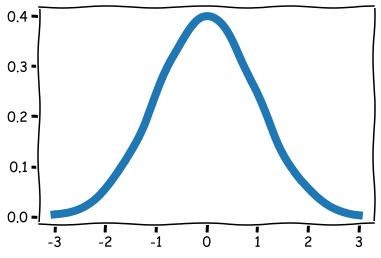

<Figure size 432x288 with 0 Axes>

In [19]:
from scipy import stats
import math
mu = 0
variance = 1
sigma = math.sqrt(variance.0)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
with plt.xkcd():
    plt.figure()
    plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth=8)
    plt.show()
    plt.savefig('/Users/thomas/Downloads/normal.png')